In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')
print(os.getcwd())

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


C:\workspace\sc_18_bike_count_test


In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.2f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Tours per Person

In [4]:

df = load_data('tour_purpose_mode')
_df = df.groupby('source').sum()[['toexpfac']].T
_df.rename(index={'toexpfac':'Average Tours'}, inplace=True)

df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(index={'psexpfac':'Average Tours'}, inplace=True)

_df/_df_person

source,model,survey
Average Tours,1.58,1.68


# Percent of Tours by Purpose

source,model,survey
pdpurp,,
Escort,11.2%,9.2%
Meal,7.3%,6.2%
Personal Business,11.7%,13.4%
School,10.9%,10.6%
Shop,12.3%,11.6%
Social,19.9%,18.7%
Work,26.6%,30.3%


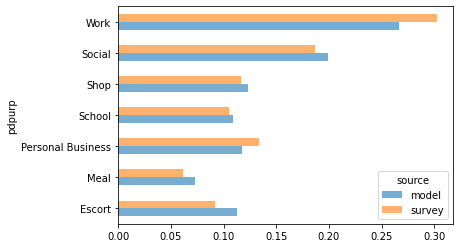

In [5]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
_df_sum = _df.sum()
_df = _df/_df_sum
_df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df.plot(kind='barh', alpha=0.6)
_df

# Tours per Person by Purpose

source,model,survey
pdpurp,,
Escort,0.18,0.16
Meal,0.12,0.10
Personal Business,0.19,0.23
School,0.17,0.18
Shop,0.19,0.20
Social,0.32,0.31
Work,0.42,0.51


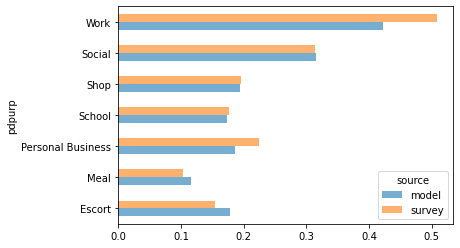

In [6]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('tour_purpose_mode')
_df = df.pivot_table(index='pdpurp', columns='source', aggfunc='sum', values='toexpfac')
# Total population
df = load_data('person_type')
_df_person = df.groupby('source').sum()[['psexpfac']].T
_df_person.rename(columns={'psexpfac': 'toexpfac'}, inplace=True)
_df.drop('Change Mode Inserted Purpose', axis=0, inplace=True)
_df = _df/_df_person.values
_df.plot(kind='barh', alpha=0.6)
_df

# Tours by Person Type

source,model,survey
pptyp,,
Child Age 0-4,"268,129","363,125"
Child Age 5-15,"743,417","888,832"
Full-Time Worker,"2,724,097","2,943,230"
High School Student Age 16+,"213,884","180,589"
Non-Working Adult Age 65+,"684,316","945,913"
Non-Working Adult Age <65,"964,553","512,159"
Part-Time Worker,"540,282","464,305"
University Student,"281,243","205,832"


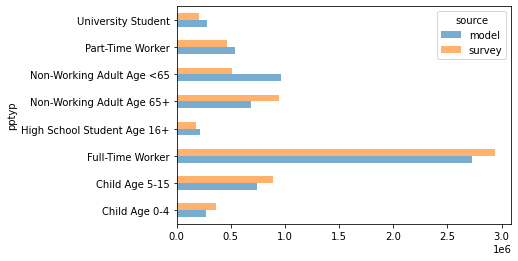

In [7]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')

df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df

## Work Tours by Person Type

source,model,survey
pptyp,,
Full-Time Worker,"1,456,850","1,719,034"
High School Student Age 16+,"8,777","3,826"
Part-Time Worker,"187,990","191,551"
University Student,"55,794","48,417"


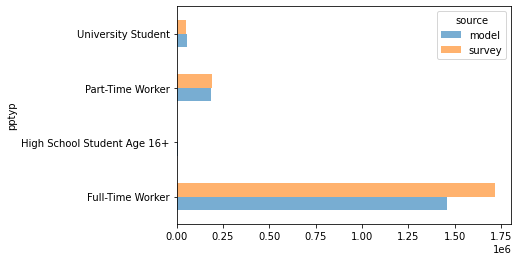

In [8]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('tour_purpose_mode')
df = df[(df['pdpurp'] == 'Work') & (df['pptyp'].isin(['Full-Time Worker','High School Student Age 16+',
                                                     'Part-Time Worker','University Student']))]
df = df.pivot_table(index='pptyp', columns='source', aggfunc='sum', values='toexpfac')
df.plot(kind='barh', alpha=0.6)
df